# Barcelona UCL Final 2011 Shot Map

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from highlight_text import fig_text
from mplsoccer.pitch import Pitch, VerticalPitch
import seaborn as sns

In [24]:
df = pd.read_csv('ucl_final_2011.csv')

In [25]:
df.head()

,Unnamed: 0,bad_behaviour_card,ball_receipt_outcome,ball_recovery_offensive,ball_recovery_recovery_failure,block_save_block,carry_end_location,clearance_aerial_won,counterpress,dribble_outcome,...,shot_statsbomb_xg,shot_technique,shot_type,substitution_outcome,substitution_replacement,tactics,team,timestamp,type,under_pressure
0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,"{'formation': 41221, 'lineup': [{'player': {'i...",Barcelona,00:00:00.000,Starting XI,NaN
1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,"{'formation': 4222, 'lineup': [{'player': {'id...",Manchester United,00:00:00.000,Starting XI,NaN
2,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Manchester United,00:00:00.000,Half Start,NaN
3,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Barcelona,00:00:00.000,Half Start,NaN
4,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Manchester United,00:00:00.000,Half Start,NaN


In [26]:
df.columns

Index(['Unnamed: 0', 'bad_behaviour_card', 'ball_receipt_outcome',
       'ball_recovery_offensive', 'ball_recovery_recovery_failure',
       'block_save_block', 'carry_end_location', 'clearance_aerial_won',
       'counterpress', 'dribble_outcome', 'dribble_overrun', 'duel_outcome',
       'duel_type', 'duration', 'foul_committed_advantage',
       'foul_committed_card', 'foul_committed_type', 'foul_won_advantage',
       'foul_won_defensive', 'goalkeeper_body_part', 'goalkeeper_end_location',
       'goalkeeper_outcome', 'goalkeeper_position', 'goalkeeper_technique',
       'goalkeeper_type', 'id', 'index', 'interception_outcome', 'location',
       'match_id', 'minute', 'off_camera', 'pass_aerial_won', 'pass_angle',
       'pass_assisted_shot_id', 'pass_backheel', 'pass_body_part',
       'pass_cross', 'pass_end_location', 'pass_goal_assist', 'pass_height',
       'pass_length', 'pass_outcome', 'pass_recipient', 'pass_shot_assist',
       'pass_switch', 'pass_type', 'period', 'play_

In [27]:
df = df[['team', 'minute','type', 'location', 'shot_outcome']]

In [28]:
df.head()

,team,minute,type,location,shot_outcome
0,Barcelona,0,Starting XI,NaN,NaN
1,Manchester United,0,Starting XI,NaN,NaN
2,Manchester United,0,Half Start,NaN,NaN
3,Barcelona,0,Half Start,NaN,NaN
4,Manchester United,45,Half Start,NaN,NaN


In [29]:
df = df[(df['team']=='Barcelona') & (df['type']=='Shot') ].reset_index()

In [30]:
df.head()

,index,team,minute,type,location,shot_outcome
0,4172,Barcelona,10,Shot,"[99.0, 39.0]",Blocked
1,4173,Barcelona,10,Shot,"[110.0, 26.0]",Blocked
2,4174,Barcelona,15,Shot,"[112.0, 44.0]",Off T
3,4175,Barcelona,19,Shot,"[97.0, 45.0]",Off T
4,4176,Barcelona,20,Shot,"[105.0, 55.0]",Saved


In [31]:
df['shot_outcome'].unique()

array(['Blocked', 'Off T', 'Saved', 'Goal'], dtype=object)

In [32]:
df.location.dtype

dtype('O')

In [33]:
df[['x','y']] = df['location'].str.split(expand=True)

In [34]:
df.head()

,index,team,minute,type,location,shot_outcome,x,y
0,4172,Barcelona,10,Shot,"[99.0, 39.0]",Blocked,"[99.0,",39.0]
1,4173,Barcelona,10,Shot,"[110.0, 26.0]",Blocked,"[110.0,",26.0]
2,4174,Barcelona,15,Shot,"[112.0, 44.0]",Off T,"[112.0,",44.0]
3,4175,Barcelona,19,Shot,"[97.0, 45.0]",Off T,"[97.0,",45.0]
4,4176,Barcelona,20,Shot,"[105.0, 55.0]",Saved,"[105.0,",55.0]


In [35]:
df['x'] = df.loc[:,'x'] = df.x.map(lambda x: x[1:-1]).astype(float)
df['y'] = df.loc[:,'y'] = df.y.map(lambda x: x[0:-1]).astype(float)

In [36]:
df.drop('location',axis=1,inplace=True)
df.head()

,index,team,minute,type,shot_outcome,x,y
0,4172,Barcelona,10,Shot,Blocked,99.0,39.0
1,4173,Barcelona,10,Shot,Blocked,110.0,26.0
2,4174,Barcelona,15,Shot,Off T,112.0,44.0
3,4175,Barcelona,19,Shot,Off T,97.0,45.0
4,4176,Barcelona,20,Shot,Saved,105.0,55.0


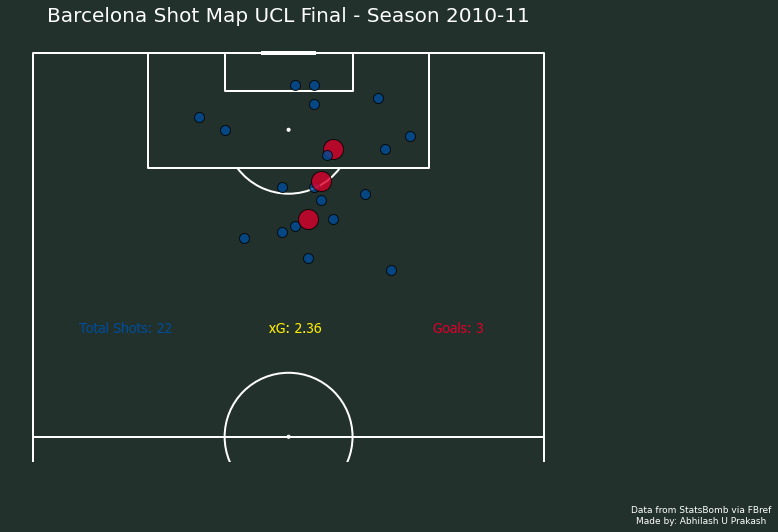

In [37]:
fig, ax = plt.subplots(figsize=(12,8))
fig.set_facecolor('#22312b')
ax.patch.set_facecolor('#22312b')

pitch = VerticalPitch(pitch_type='statsbomb', orientation='vertical',
             pitch_color='#22312b',line_color='white',figsize=(10,10),
             constrained_layout=True,tight_layout=True,view='half',half=True)
pitch.draw(ax=ax)

for x in range(len(df['x'])):
    if df['shot_outcome'][x] == 'Goal':
        plt.scatter(df['y'][x], df['x'][x], color='#DB002C', s=400, edgecolors = 'black', alpha=0.8)
        
    else:
        plt.scatter(df['y'][x], df['x'][x], color='#004C99', edgecolors = 'black', s=100,alpha=0.8)
        
        
total_shots = len(df)
text_color_s = '#004C99'
text_color = '#FFEE00'
text_color_g = '#DB002C'
fig_text(s=f'Total Shots: {total_shots}',
        x=.27, y =.37, fontsize=14,fontfamily='Tahoma',color=text_color_s)
fig_text(s=f'xG: 2.36',
        x=.49, y =.37, fontsize=14,fontfamily='Tahoma',color=text_color)
fig_text(s=f'Goals: 3',
        x=.68, y =.37, fontsize=14,fontfamily='Tahoma',color=text_color_g)
        
        
plt.title("Barcelona Shot Map UCL Final - Season 2010-11", c='white', size=20)

CREDIT_1 = "Data from StatsBomb via FBref"
CREDIT_2 = "Made by: Abhilash U Prakash"

fig.text(
    0.99, 0.02, f"{CREDIT_1}\n{CREDIT_2}", size=9,color='white',ha='center');

plt.savefig("barca", dpi=100, bbox_inches="tight")

In [ ]:
#In case we want to plot all the shot outcomes, these lines of code can be used as well.
if df['shot_outcome'][x] == 'Blocked':
        plt.scatter(df['y'][x], df['x'][x], color='grey', s=100, alpha=0.8)
        
    if df['shot_outcome'][x] == 'Off T':
        plt.scatter(df['y'][x], df['x'][x], color='black', s=100, alpha=0.8)
        
    if df['shot_outcome'][x] == 'Saved':
        plt.scatter(df['y'][x], df['x'][x], color='blue', s=100, alpha=0.8